In [1]:
pip install dtreeviz.trees

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dtreeviz.trees (from versions: none)
ERROR: No matching distribution found for dtreeviz.trees


In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import statistics as stat
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans , AgglomerativeClustering, DBSCAN
import graphviz
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
Housing_Data=pd.read_csv('Housing_Data_5.csv')
Housing_Data=Housing_Data.drop(columns=['Unnamed: 0'])
Housing_Data

,bathrooms,bedrooms,city,country,currency,latitude,livingArea,longitude,lotAreaUnit,priceForHDP,rentZestimate,state,streetAddress,taxAssessedValue,zestimate,zipcode,priceinmil,lotArea
0,4.0,4.0,Denver,USA,USD,39.724728,2202.0,-104.959140,sqft,1500000.0,3170.0,CO,530 University Boulevard,726200.0,1031000.0,80206,1.5000,3.6290
1,3.0,4.0,Denver,USA,USD,39.648630,2659.0,-105.055405,sqft,725000.0,2429.0,CO,3781 S Benton Way,444900.0,455700.0,80235,0.7250,12.2150
2,5.0,4.0,Denver,USA,USD,39.770897,3991.0,-105.013214,sqft,1800000.0,7454.0,CO,3926 Vallejo Street,621200.0,1395200.0,80211,1.8000,6.2500
3,5.0,6.0,Denver,USA,USD,39.665450,3838.0,-104.963524,sqft,1500000.0,3746.0,CO,2832 S Race Street,712500.0,1474576.0,80210,1.5000,8.7120
4,3.0,4.0,Denver,USA,USD,39.769943,2292.0,-105.021260,sqft,1200000.0,3405.0,CO,2730 W Denver Place,216300.0,870300.0,80211,1.2000,4.9050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,2.0,3.0,Mills,USA,USD,42.835503,3372.0,-106.413000,sqft,449900.0,2128.0,WY,1302 River Heights Dr,327731.0,431700.0,82604,0.4499,11.7612
839,2.0,4.0,Douglas,USA,USD,42.763844,2304.0,-105.382230,sqft,110000.0,1935.0,WY,403 N 4th St,135752.0,169900.0,82633,0.1100,11.3256
840,2.0,3.0,Evanston,USA,USD,41.254820,1150.0,-110.959460,sqft,159000.0,1195.0,WY,801 Sioux Dr,114419.0,149900.0,82930,0.1590,0.5760
841,4.0,6.0,Gillette,USA,USD,44.245415,5022.0,-105.562035,sqft,998000.0,3622.0,WY,5221 Rocky Point Dr,638339.0,728600.0,82718,0.9980,424.2744


In [4]:
Housing_Data['range_1'] = pd.cut(Housing_Data['zestimate'], bins=[0,400000,800000,float('inf')], labels=['Low','Medium','High'])

In [5]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   bathrooms         843 non-null    float64 
 1   bedrooms          843 non-null    float64 
 2   city              843 non-null    object  
 3   country           843 non-null    object  
 4   currency          843 non-null    object  
 5   latitude          843 non-null    float64 
 6   livingArea        843 non-null    float64 
 7   longitude         843 non-null    float64 
 8   lotAreaUnit       843 non-null    object  
 9   priceForHDP       843 non-null    float64 
 10  rentZestimate     843 non-null    float64 
 11  state             843 non-null    object  
 12  streetAddress     843 non-null    object  
 13  taxAssessedValue  843 non-null    float64 
 14  zestimate         843 non-null    float64 
 15  zipcode           843 non-null    int64   
 16  priceinmil        843 non-

In [6]:
Housing_Data['range_1'] = Housing_Data['range_1'].astype('category').cat.codes

In [7]:
counts = Housing_Data['range_1'].value_counts()
counts

0    512
1    237
2     94
Name: range_1, dtype: int64

In [8]:
Housing_Data_1 = Housing_Data.select_dtypes(include='number')
Housing_Data_1=Housing_Data_1.drop(columns=['longitude'])

In [9]:
Housing_Data_2 = Housing_Data_1.sample(n=843, random_state=42)
Housing_Data_2

,bathrooms,bedrooms,latitude,livingArea,priceForHDP,rentZestimate,taxAssessedValue,zestimate,zipcode,priceinmil,lotArea,range_1
493,1.0,3.0,37.090595,1077.0,137500.0,816.0,46770.0,130755.0,64801,0.1375,12.196800,0
215,3.0,4.0,32.916492,2035.0,372000.0,2185.0,198732.0,372000.0,29420,0.3720,10.018800,0
622,3.0,4.0,46.908290,2896.0,299000.0,2166.0,296300.0,357800.0,58401,0.2990,18.600120,0
737,1.0,2.0,38.661960,960.0,224900.0,1150.0,100794.0,168600.0,84724,0.2249,40.075200,0
63,2.0,4.0,29.578120,2253.0,225000.0,2199.0,223335.0,225000.0,77089,0.2250,7.819020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,4.0,4.0,32.827625,3660.0,750000.0,2034.0,361890.0,740859.0,75218,0.7500,22.259160,1
106,4.0,4.0,33.459800,2380.0,770000.0,3300.0,442600.0,749084.0,85257,0.7700,2.962080,1
270,3.0,3.0,38.881073,2094.0,1750000.0,4800.0,975850.0,1705626.0,20003,1.7500,1.194000,2
435,2.0,3.0,42.579037,1970.0,345000.0,2499.0,229300.0,347300.0,1440,0.3450,16.903000,0


In [10]:
from sklearn.model_selection import train_test_split
TrainDF, TestDF = train_test_split(Housing_Data_2, test_size=0.3)
print(TrainDF)
print(TestDF)

     bathrooms  bedrooms   latitude  livingArea  priceForHDP  rentZestimate  \
454        2.0       3.0  43.598564      1512.0     159000.0         1200.0   
66         1.0       3.0  29.859964      1540.0     375000.0         1701.0   
415        3.0       3.0  39.278915      2601.0     740000.0         5436.0   
626        3.0       4.0  48.245220      2504.0     239900.0         1567.0   
427        2.0       2.0  41.660660      1071.0     304900.0         2570.0   
..         ...       ...        ...         ...          ...            ...   
99         3.0       3.0  33.155422      1543.0     225000.0         1706.0   
401        2.0       2.0  29.941345      1344.0     465000.0         3200.0   
661        6.0       6.0  44.540787      2504.0     555000.0         3497.0   
644        1.0       3.0  39.743652      1053.0      90000.0         1075.0   
569        2.0       3.0  42.948370      1736.0     410000.0         2374.0   

     taxAssessedValue  zestimate  zipcode  priceinm

In [11]:
Test1Labels=TestDF["range_1"]
print(Test1Labels)
## remove labels
TestDF1 = TestDF.drop(["range_1"], axis=1)
print(TestDF1)

## TRAIN ----------------------------
Train1Labels=TrainDF["range_1"]
print(Train1Labels)
## remove labels
TrainDF1 = TrainDF.drop(["range_1"], axis=1)
print(TrainDF1)

304    0
491    0
687    2
225    0
685    1
      ..
738    0
680    2
412    1
481    1
371    1
Name: range_1, Length: 253, dtype: int8
     bathrooms  bedrooms   latitude  livingArea  priceForHDP  rentZestimate  \
304        1.0       3.0  41.089320      1064.0     125000.0         1183.0   
491        1.0       2.0  38.438076      1138.0     125000.0          749.0   
687        3.0       4.0  41.573757      2280.0     875000.0         3200.0   
225        2.0       3.0  61.300920      1452.0     329000.0         2199.0   
685        2.0       3.0  41.624676      1232.0     495000.0         2234.0   
..         ...       ...        ...         ...          ...            ...   
738        2.0       2.0  40.652447      1040.0     340000.0         1514.0   
680        3.0       4.0  41.612057      3300.0    1724500.0         5007.0   
412        5.0       3.0  39.112026      1638.0     730000.0         3349.0   
481        4.0       4.0  30.512930      3240.0     449000.0         30

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
#import graphviz 
from sklearn.metrics import confusion_matrix
MyDT=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',
                           max_depth=2,
                           class_weight=None)

In [13]:
MyDT.fit(TrainDF, Train1Labels)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[11] <= 0.5\nentropy = 1.312\nsamples = 590\nvalue = [359, 161, 70]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 359\nvalue = [359, 0, 0]'),
 Text(0.6, 0.5, 'X[7] <= 803300.0\nentropy = 0.885\nsamples = 231\nvalue = [0, 161, 70]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 161\nvalue = [0, 161, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 70\nvalue = [0, 0, 70]')]

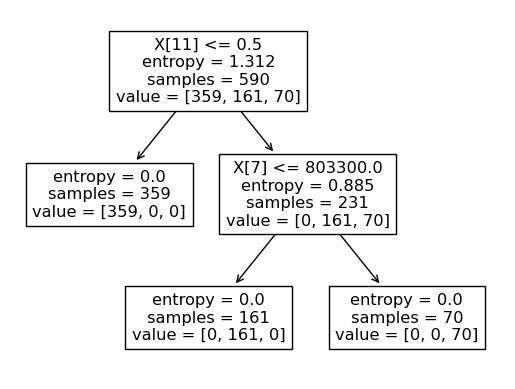

In [14]:
 tree.plot_tree(MyDT)

In [15]:
from sklearn.naive_bayes import MultinomialNB
MyModelNB= MultinomialNB()
NB1=MyModelNB.fit(TrainDF1, Train1Labels)
Prediction1 = MyModelNB.predict(TestDF1)

In [16]:
from sklearn.metrics import confusion_matrix

cnf_matrix1 = confusion_matrix(Test1Labels, Prediction1)
print("\nThe confusion matrix is:")
print(cnf_matrix1)



The confusion matrix is:
[[117  25  11]
 [ 26  23  27]
 [  0   5  19]]


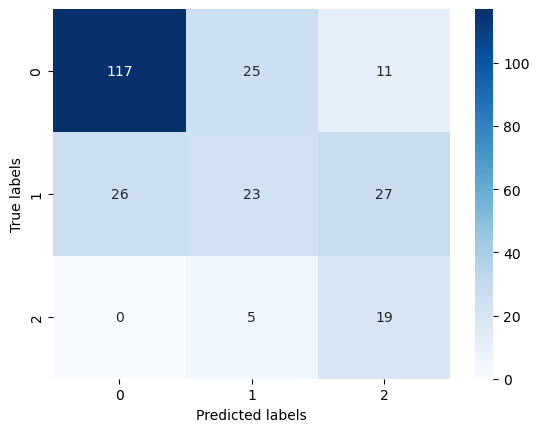

In [17]:
sns.heatmap(cnf_matrix1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [18]:
# SVM
svm = SVC(kernel='rbf', C=1)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


0.9486166007905138

In [19]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[150   3   0]
 [  7  68   1]
 [  0   2  22]]


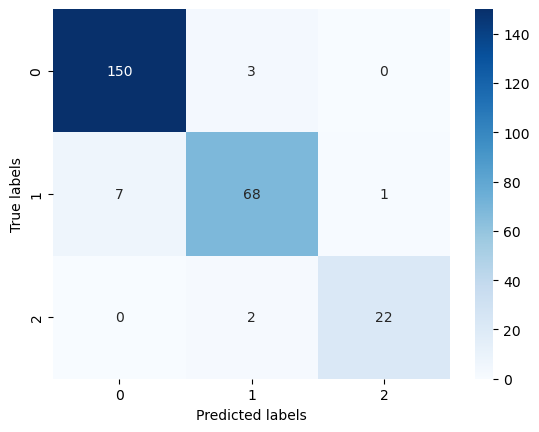

In [20]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [21]:
svm = SVC(kernel='rbf', C=2)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


0.9525691699604744

In [22]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[150   3   0]
 [  8  67   1]
 [  0   0  24]]


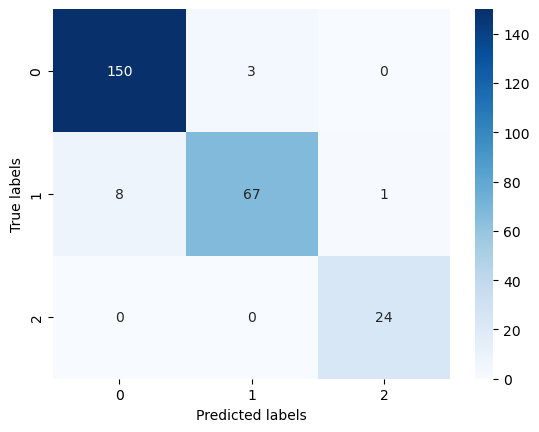

In [23]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [24]:
svm = SVC(kernel='rbf', C=3)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


0.9683794466403162

In [25]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[150   3   0]
 [  5  71   0]
 [  0   0  24]]


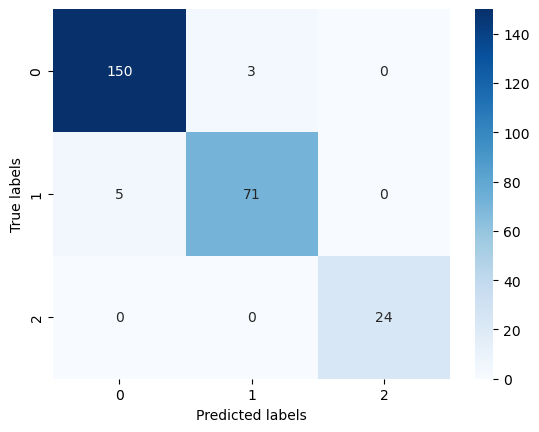

In [26]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [27]:
svm = SVC(kernel='poly', C=1)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


0.9288537549407114

In [28]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[150   3   0]
 [ 15  61   0]
 [  0   0  24]]


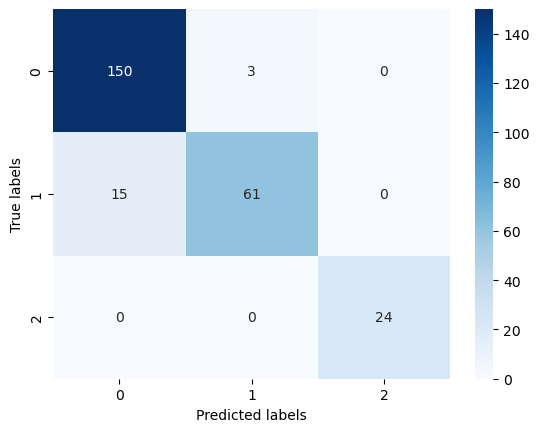

In [29]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [30]:
svm = SVC(kernel='poly', C=2)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


0.932806324110672

In [31]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[150   3   0]
 [ 14  62   0]
 [  0   0  24]]


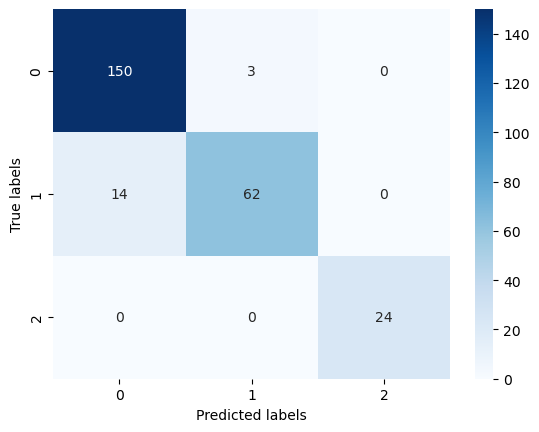

In [32]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [33]:
svm = SVC(kernel='poly', C=3)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


0.9407114624505929

In [34]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[150   3   0]
 [ 12  64   0]
 [  0   0  24]]


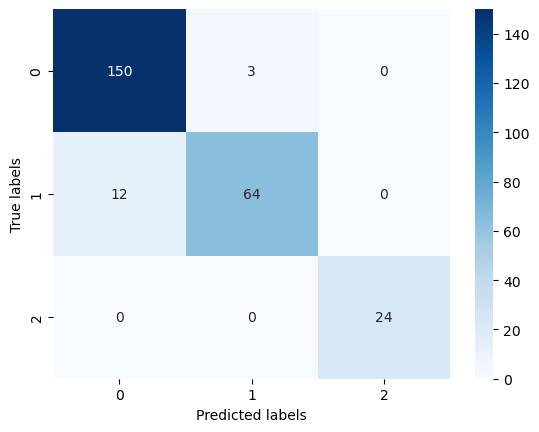

In [35]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [36]:
svm = SVC(kernel='linear', C=1)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


0.9960474308300395

In [37]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[153   0   0]
 [  0  75   1]
 [  0   0  24]]


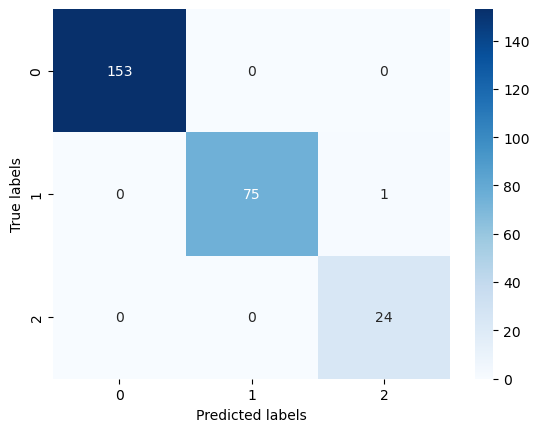

In [38]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [39]:
svm = SVC(kernel='linear', C=2)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


0.9960474308300395

In [40]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[153   0   0]
 [  0  75   1]
 [  0   0  24]]


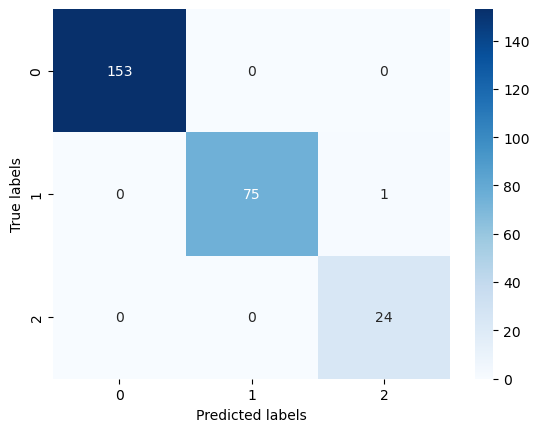

In [41]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [42]:
svm = SVC(kernel='linear', C=3)
svm.fit(TrainDF1, Train1Labels)
pred= svm.predict(TestDF1)
print("\nThe Accuracy Score is:")
accuracy_score(Test1Labels,pred)


The Accuracy Score is:


0.9960474308300395

In [43]:
cnf_matrix2 = confusion_matrix(Test1Labels, pred)
print("\nThe confusion matrix is:")
print(cnf_matrix2)


The confusion matrix is:
[[153   0   0]
 [  0  75   1]
 [  0   0  24]]


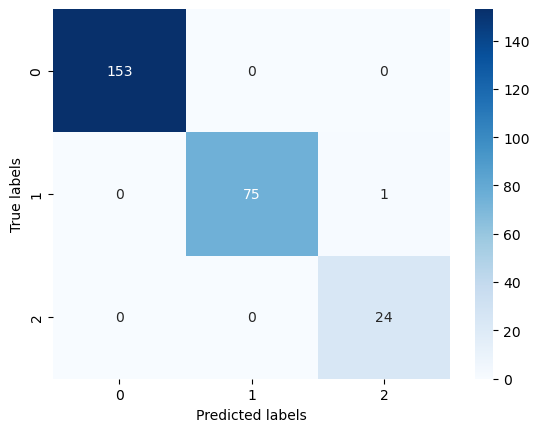

In [44]:
sns.heatmap(cnf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [45]:
Housing_Data_reg=Housing_Data_2[['livingArea','zestimate']]

In [47]:
TrainDF1, TestDF1 = train_test_split(Housing_Data_reg, test_size=0.3)
print(TrainDF1)
print(TestDF1)

     livingArea  zestimate
718      2476.0   943300.0
192      2724.0   519600.0
385      1667.0   371700.0
426      2080.0   393100.0
721      1612.0   240100.0
..          ...        ...
523      2328.0   408700.0
395      1550.0   310792.0
97        936.0   131000.0
62       1490.0   323444.0
308      1040.0    99700.0

[590 rows x 2 columns]
     livingArea  zestimate
746      1352.0   242100.0
70       1336.0   419294.0
96       3549.0   557100.0
391      1900.0   353100.0
621      2494.0   464500.0
..          ...        ...
676      1402.0   357000.0
536      1400.0   238500.0
438      9591.0  4319900.0
229      1650.0   369544.0
702      3167.0   809000.0

[253 rows x 2 columns]


In [48]:
Test1Labels=TestDF["zestimate"]
print(Test1Labels)
## remove labels
TestDF1 = TestDF.drop(["zestimate"], axis=1)
print(TestDF1)

## TRAIN ----------------------------
Train1Labels=TrainDF["zestimate"]
print(Train1Labels)
## remove labels
TrainDF1 = TrainDF.drop(["zestimate"], axis=1)
print(TrainDF1)

784     694400.0
510     163678.0
733     489249.0
634     240222.0
140    2499016.0
         ...    
783     309200.0
614     439800.0
121     323400.0
228     299611.0
742     304300.0
Name: zestimate, Length: 253, dtype: float64
     livingArea
784      2995.0
510      1700.0
733      1802.0
634      1920.0
140      5424.0
..          ...
783      2420.0
614      1848.0
121      1643.0
228      2480.0
742      1320.0

[253 rows x 1 columns]
641    200700.0
413    544200.0
448    380500.0
97     131000.0
341    150100.0
         ...   
167    414600.0
817    288400.0
410    424100.0
547    789000.0
52     265517.0
Name: zestimate, Length: 590, dtype: float64
     livingArea
641      1776.0
413      2080.0
448      1709.0
97        936.0
341      1158.0
..          ...
167      3280.0
817      2742.0
410      2352.0
547      3862.0
52       1446.0

[590 rows x 1 columns]


In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(TrainDF1,Train1Labels)

LinearRegression()

In [57]:
slope=model.coef_[0]
intercept=model.intercept_
print(f'y= {slope:.2f}x + {intercept:.2f}')

y= 256.89x + -75839.89


In [52]:
from sklearn.metrics import mean_squared_error
Test1Pred = model.predict(TestDF1)
mspe = mean_squared_error(Test1Labels, Test1Pred)
print('Mean Squared Prediction Error (MSPE):', mspe)

Mean Squared Prediction Error (MSPE): 197140401020.85062


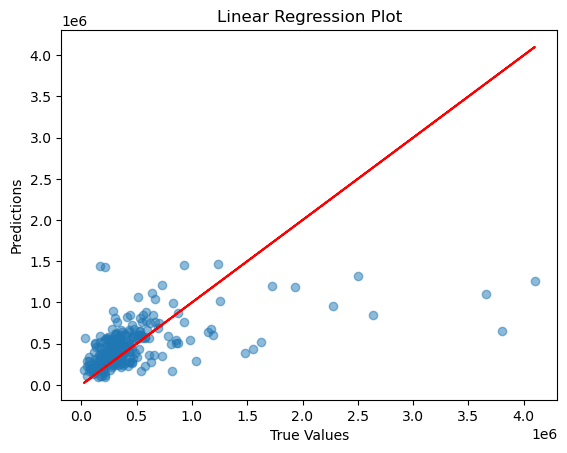

In [53]:

plt.scatter(Test1Labels, Test1Pred, alpha=0.5)

plt.plot(Test1Labels, Test1Labels, color='red')

plt.title('Linear Regression Plot')
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Show the plot
plt.show()
